# Handiling Missing Values


In this article will look into handling missing values.

* Generally, missing values are denoted by NaN, null, or None. Missing data refers to the absence of values for certain observations and is an unavoidable problem in most data sources. The act of replacing missing data with statistical estimates of missing values is called imputation. The goal of any imputation technique is to produce a complete
dataset that can be used to train machine learning models. There are multiple imputation techniques we can apply to our data. Some are mentioned below:


* Table of Contents:

1. Removing observations with missing data
2. Performing mean or median imputation
3. Performing mode or frequent category imputation
4. Capturing missing values in a bespoke category
5. Replacing missing values with an arbitrary number
6. Fill Missing Data With interpolate()




In [1]:
#importing libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline


import warnings
warnings.filterwarnings('ignore')

In [2]:
#loading Data set alias called bf

d0=pd.read_csv(r'file:///E:\Users\Raviteja\Downloads\EDA%20class\Dataset%20for%20eda%2024sep\data0\aug_test.csv')

In [3]:
# using head() function to show top 05 rows
d0.head()

,enrollee_id,city,city_development_index,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,last_new_job,training_hours
0,32403,city_41,0.827,Male,Has relevent experience,Full time course,Graduate,STEM,9,<10,NaN,1,21
1,9858,city_103,0.920,Female,Has relevent experience,no_enrollment,Graduate,STEM,5,NaN,Pvt Ltd,1,98
2,31806,city_21,0.624,Male,No relevent experience,no_enrollment,High School,NaN,<1,NaN,Pvt Ltd,never,15
3,27385,city_13,0.827,Male,Has relevent experience,no_enrollment,Masters,STEM,11,10/49,Pvt Ltd,1,39
4,27724,city_103,0.920,Male,Has relevent experience,no_enrollment,Graduate,STEM,>20,10000+,Pvt Ltd,>4,72


In [4]:
# Extracting columns using List comprehension

[fea for fea in d0.columns]

['enrollee_id',
 'city',
 'city_development_index',
 'gender',
 'relevent_experience',
 'enrolled_university',
 'education_level',
 'major_discipline',
 'experience',
 'company_size',
 'company_type',
 'last_new_job',
 'training_hours']

In [5]:
#To check null values in data

d0.isnull()

,enrollee_id,city,city_development_index,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,last_new_job,training_hours
0,False,False,False,False,False,False,False,False,False,False,True,False,False
1,False,False,False,False,False,False,False,False,False,True,False,False,False
2,False,False,False,False,False,False,False,True,False,True,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2124,False,False,False,False,False,False,False,False,False,True,False,False,False
2125,False,False,False,False,False,False,False,False,False,True,True,False,False
2126,False,False,False,False,False,False,False,True,False,True,False,False,False
2127,False,False,False,False,False,False,False,True,False,False,False,False,False


In [6]:
#To count null values in data column wise

d0.isnull().sum()

enrollee_id                 0
city                        0
city_development_index      0
gender                    508
relevent_experience         0
enrolled_university        31
education_level            52
major_discipline          312
experience                  5
company_size              622
company_type              634
last_new_job               40
training_hours              0
dtype: int64

In [7]:
#To count total null values in entire data 

d0.isnull().sum().sum()

2204

In [8]:
#Defining a function to count NUll values.

def missing_values_table(d0):
        # Total missing values
        mis_val = d0.isnull().sum()
        
        # Percentage of missing values
        mis_val_percent = 100 * d0.isnull().sum() / len(d0)
        
        # Make a table with the results
        mis_val_table = pd.concat([mis_val, mis_val_percent], axis=1)
        
        # Rename the columns
        mis_val_table_ren_columns = mis_val_table.rename(
        columns = {0 : 'Missing Values', 1 : '% of Total Values'})
        
        # Sort the table by percentage of missing descending
        mis_val_table_ren_columns = mis_val_table_ren_columns[
            mis_val_table_ren_columns.iloc[:,1] != 0].sort_values(
        '% of Total Values', ascending=False).round(1)
        
        # Print some summary information
        print ("Your selected dataframe has " + str(d0.shape[1]) + " columns.\n"      
            "There are " + str(mis_val_table_ren_columns.shape[0]) +
              " columns that have missing values.")
        
        # Return the dataframe with missing information
        return mis_val_table_ren_columns


In [9]:
missing_values_table(d0)

Your selected dataframe has 13 columns.
There are 8 columns that have missing values.


,Missing Values,% of Total Values
company_type,634,29.8
company_size,622,29.2
gender,508,23.9
major_discipline,312,14.7
education_level,52,2.4
last_new_job,40,1.9
enrolled_university,31,1.5
experience,5,0.2


Text(0.5, 1.0, 'Quantifying missing data')

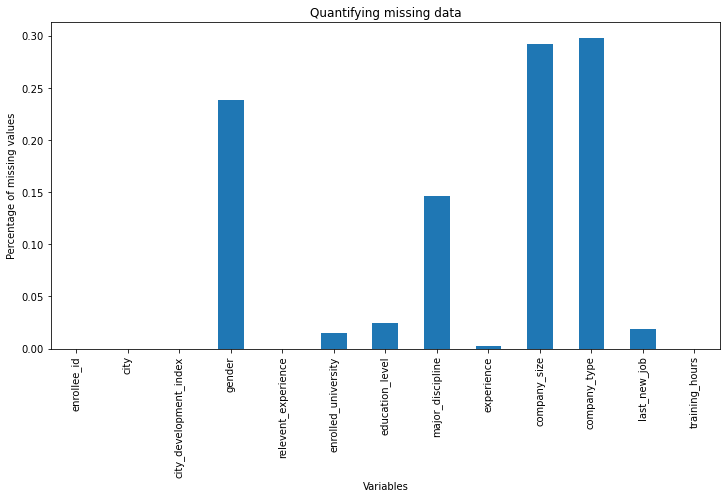

In [10]:
#plotting Null values

d0.isnull().mean().plot.bar(figsize=(12,6))
plt.ylabel('Percentage of missing values')
plt.xlabel('Variables')
plt.title('Quantifying missing data')

# 1. Removing observations with missing data


During Listwise deletion, complete rows/columns(which contain the missing values) are deleted. As a result, it is also called Complete Case deletion. 

A major diadvantage of Listwise deletion is that a major chunk of data and hence a lot of information is lost. Hence, it is advisable to use it only when the number of missing values is very small.



In [11]:
#Removing ROW containing MIssing values

d0_row_na = d0.dropna(0)

print("Number of ROws and columns before deletion =", d0.shape)
print("Number of ROws and columns after deletion =", d0_row_na.shape)

Number of ROws and columns before deletion = (2129, 13)
Number of ROws and columns after deletion = (1019, 13)


In [12]:
#Removing Columns containing MIssing values

d0_col_na = d0.dropna(1)

print("Number of ROws and columns before deletion =", d0.shape)
print("Number of ROws and columns after deletion =", d0_col_na.shape)

Number of ROws and columns before deletion = (2129, 13)
Number of ROws and columns after deletion = (2129, 5)





# 2. Performing mean or median imputation

* Filling the missing data with the mean or median value if it’s a numerical variable.

In [13]:
#Filling the missing data with the mean 

#importing data set
bf = pd.read_csv('blackFriday_train.csv')

#finding null values in data set
bf.isnull().sum()

User_ID                            0
Product_ID                         0
Gender                             0
Age                                0
Occupation                         0
City_Category                      0
Stay_In_Current_City_Years         0
Marital_Status                     0
Product_Category_1                 0
Product_Category_2            173638
Product_Category_3            383247
Purchase                           0
dtype: int64

#### FINDING TOTAL VALUES, NULL VALUES AND MEAN OF THE COLUMN

In [14]:
print("Mean value of 'Product_Category_3'=", bf['Product_Category_3'].mean())
print("Total number of entries in Column 'Product_Category_3'=",bf['Product_Category_3'].count())
print("Total number of NULL VALUES in Column 'Product_Category_3'=",bf['Product_Category_3'].isnull().sum())

#Loading Column 'Product_Category_3' intp alias bf_pc3

bf_pc3 = bf['Product_Category_3']

#calculating mean value of bf_pc3
print("Mean value of 'bf_pc3'=", bf_pc3.mean())

#Storing mean value of bf_pc3 in pc3_mean
pc3_mean =  bf_pc3.mean()
print("Mean value of 'pc3_mean'=", bf_pc3.mean())


Mean value of 'Product_Category_3'= 12.668243206790512
Total number of entries in Column 'Product_Category_3'= 166821
Total number of NULL VALUES in Column 'Product_Category_3'= 383247
Mean value of 'bf_pc3'= 12.668243206790512
Mean value of 'pc3_mean'= 12.668243206790512


### Filling the missing data with the mean

In [15]:
#Fill NA MEAN in null values of  bf_pc3

print("Total number of entries in Column 'bf_pc3=",bf_pc3.count())
print("Total number of NULL VALUES in Column 'bf_pc3' before fill =",bf_pc3.isnull().sum())


bf_fill_mean_pc3 = bf_pc3.fillna(value=pc3_mean, inplace=True)

print("Total number of entries in Column 'bf_pc3=",bf_pc3.count())
print("Total number of NULL VALUES in Column 'bf_pc3 after fill NA'=",bf_pc3.isnull().sum())

Total number of entries in Column 'bf_pc3= 166821
Total number of NULL VALUES in Column 'bf_pc3' before fill = 383247
Total number of entries in Column 'bf_pc3= 550068
Total number of NULL VALUES in Column 'bf_pc3 after fill NA'= 0


#### FINDING TOTAL VALUES, NULL VALUES AND MEDIAN OF THE COLUMN

In [16]:
print("Median value of 'Product_Category_2'=", bf['Product_Category_2'].median())
print("Total number of entries in Column 'Product_Category_2'=",bf['Product_Category_2'].count())
print("Total number of NULL VALUES in Column 'Product_Category_2'=",bf['Product_Category_2'].isnull().sum())

#Loading Column 'Product_Category_2' intp alias bf_pc2

bf_pc2 = bf['Product_Category_2']

#calculating median value of bf_pc2
print("Median value of 'bf_pc2'=", bf_pc2.median())

#Storing mean value of bf_pc2 in pc2_mean
pc2_median =  bf_pc2.median()
print("Median value of 'pc2_median'=", bf_pc2.median())


Median value of 'Product_Category_2'= 9.0
Total number of entries in Column 'Product_Category_2'= 376430
Total number of NULL VALUES in Column 'Product_Category_2'= 173638
Median value of 'bf_pc2'= 9.0
Median value of 'pc2_median'= 9.0


### Filling the missing data with the median

In [17]:
#Fill NA MEDIAN in null values of  bf_pc3

print("Total number of entries in Column 'bf_pc2=",bf_pc2.count())
print("Total number of NULL VALUES in Column 'bf_pc2' before fill =",bf_pc2.isnull().sum())


bf_fill_median_pc2 = bf_pc2.fillna(value= pc2_median, inplace=True)

print("Total number of entries in Column 'bf_pc2=",bf_pc2.count())
print("Total number of NULL VALUES in Column 'bf_pc2 after fill NA'=",bf_pc2.isnull().sum())

Total number of entries in Column 'bf_pc2= 376430
Total number of NULL VALUES in Column 'bf_pc2' before fill = 173638
Total number of entries in Column 'bf_pc2= 550068
Total number of NULL VALUES in Column 'bf_pc2 after fill NA'= 0


# 3. Performing mode or frequent category imputation
* Mode imputation consists of replacing missing values with the mode. We normally use this procedure in categorical variables, hence the frequent category imputation name. 

In [18]:
print("Total number of entries in Column ''education_level''=",d0['education_level'].count())
print("Total number of NULL VALUES in Column ''education_level'' =",d0['education_level'].isnull().sum())

d0_mode = d0['education_level'].mode()
print("Mode of column 'education_level'=",d0_mode[0])



Total number of entries in Column ''education_level''= 2077
Total number of NULL VALUES in Column ''education_level'' = 52
Mode of column 'education_level'= Graduate


In [19]:
print("Total number of entries in Column ''education_level''=",d0['education_level'].count())
print("Total number of NULL VALUES in Column ''education_level'' before fill=",d0['education_level'].isnull().sum())

d0_fill_mode = d0['education_level'].fillna(value= d0_mode[0], inplace=True)


print("Total number of entries in Column ''education_level''=",d0['education_level'].count())
print("Total number of NULL VALUES in Column ''education_level''after fill=",d0['education_level'].isnull().sum())

Total number of entries in Column ''education_level''= 2077
Total number of NULL VALUES in Column ''education_level'' before fill= 52
Total number of entries in Column ''education_level''= 2129
Total number of NULL VALUES in Column ''education_level''after fill= 0




# 4. Capturing missing values in a bespoke category

* Missing data in categorical variables can be treated as a different category, so it is common to replace missing values with the Missing string. 

In [20]:
print("Total number of entries in Column ''gender''=",d0['gender'].count())
print("Total number of NULL VALUES in Column ''education_level'' before fill=",d0['gender'].isnull().sum())

d0_fill_missing = d0['gender'].fillna(value= 'Missing', inplace=True)


print("Total number of entries in Column ''gender''=",d0['gender'].count())
print("Total number of NULL VALUES in Column ''gender''after fill with Missing=",d0['gender'].isnull().sum())

Total number of entries in Column ''gender''= 1621
Total number of NULL VALUES in Column ''education_level'' before fill= 508
Total number of entries in Column ''gender''= 2129
Total number of NULL VALUES in Column ''gender''after fill with Missing= 0




# 5. Replacing missing values with an arbitrary number
* Arbitrary number imputation consists of replacing missing values with an arbitrary value. Some commonly used values include 0, 999, 9999, or -1 for positive distributions. This method is suitable for numerical variables.



In [21]:
#importing data set
tr= pd.read_csv(r'file:///E:\Users\Raviteja\Downloads\EDA%20class\Dataset%20for%20eda%2024sep\data1\Travel.csv')
tr.head()

,CustomerID,ProdTaken,Age,TypeofContact,CityTier,DurationOfPitch,Occupation,Gender,NumberOfPersonVisiting,NumberOfFollowups,ProductPitched,PreferredPropertyStar,MaritalStatus,NumberOfTrips,Passport,PitchSatisfactionScore,OwnCar,NumberOfChildrenVisiting,Designation,MonthlyIncome
0,200000,1,41.0,Self Enquiry,3,6.0,Salaried,Female,3,3.0,Deluxe,3.0,Single,1.0,1,2,1,0.0,Manager,20993.0
1,200001,0,49.0,Company Invited,1,14.0,Salaried,Male,3,4.0,Deluxe,4.0,Divorced,2.0,0,3,1,2.0,Manager,20130.0
2,200002,1,37.0,Self Enquiry,1,8.0,Free Lancer,Male,3,4.0,Basic,3.0,Single,7.0,1,3,0,0.0,Executive,17090.0
3,200003,0,33.0,Company Invited,1,9.0,Salaried,Female,2,3.0,Basic,3.0,Divorced,2.0,1,5,1,1.0,Executive,17909.0
4,200004,0,NaN,Self Enquiry,1,8.0,Small Business,Male,2,3.0,Basic,4.0,Divorced,1.0,0,5,1,0.0,Executive,18468.0


### Filling the missing data with arbitary value 

In [22]:
print("Total number of entries in Column 'Age'=",tr['Age'].count())
print("Total number of NULL VALUES in Column 'Age'= before fill",tr['Age'].isnull().sum())

tr_fill_missing_0 = tr['Age'].fillna(value= 0, inplace=True)

print("Total number of entries in Column 'Age'=",tr['Age'].count())
print("Total number of NULL VALUES in Column 'Age' after fill with 0=",tr['Age'].isnull().sum())


Total number of entries in Column 'Age'= 4662
Total number of NULL VALUES in Column 'Age'= before fill 226
Total number of entries in Column 'Age'= 4888
Total number of NULL VALUES in Column 'Age' after fill with 0= 0




# 6. Fill Missing Data With interpolate()
* The interpolate() function uses existing values in the DataFrame to estimate the missing values in the rows.


In [23]:
# Interpolate Forward
print("Total number of entries in Column 'DurationOfPitch'=",tr['DurationOfPitch'].count())
print("Total number of NULL VALUES in Column 'DurationOfPitch'before fill=",tr['DurationOfPitch'].isnull().sum())

tr['DurationOfPitch'].interpolate(method ='linear', limit_direction ='forward', inplace=True)

print("Total number of entries in Column 'DurationOfPitch'=",tr['DurationOfPitch'].count())
print("Total number of NULL VALUES in Column 'DurationOfPitch' after 'forward' fill=",tr['DurationOfPitch'].isnull().sum())

Total number of entries in Column 'DurationOfPitch'= 4637
Total number of NULL VALUES in Column 'DurationOfPitch'before fill= 251
Total number of entries in Column 'DurationOfPitch'= 4888
Total number of NULL VALUES in Column 'DurationOfPitch' after 'forward' fill= 0


In [24]:
# Interpolate Backward
print("Total number of entries in Column 'NumberOfFollowups'=",tr['NumberOfFollowups'].count())
print("Total number of NULL VALUES in Column 'NumberOfFollowups' before fill=",tr['NumberOfFollowups'].isnull().sum())

tr['NumberOfFollowups'].interpolate(method ='linear', limit_direction ='forward', inplace=True)

print("Total number of entries in Column 'NumberOfFollowups'=",tr['NumberOfFollowups'].count())
print("Total number of NULL VALUES in Column 'NumberOfFollowups' after Backward fill =",tr['NumberOfFollowups'].isnull().sum())

Total number of entries in Column 'NumberOfFollowups'= 4843
Total number of NULL VALUES in Column 'NumberOfFollowups' before fill= 45
Total number of entries in Column 'NumberOfFollowups'= 4888
Total number of NULL VALUES in Column 'NumberOfFollowups' after Backward fill = 0
